# Project: Investigate Health Economics Impacts

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This project uses data from the gapminder website to look for correlations or trends in health economics and health data (with life expectancy and child mortality being the representative indicators for health)

## Description of all source data from Gapminder


GINI Coefficient - gini.csv
GINI shows income inequality in a society. A Higher number means more inequality
https://www.gapminder.org/data/documentation/gini/


GNI per capita, PPP (current international $) - gnipercapita_ppp_current_international.csv
GNI per capita based on purchasing power parity (PPP). PPP GNI is gross national income (GNI) converted to international dollars using purchasing power parity rates. An international dollar has the same purchasing power over GNI as a U.S. dollar has in the United States. GNI is the sum of value added by all resident producers plus any product taxes (less subsidies) not included in the valuation of output plus net receipts of primary income (compensation of employees and property income) from abroad. Data are in current international dollars based on the 2011 ICP round.


Govt. Health Spending of total government spending (%) - government_health_spending_of_total_gov_spending_percent.csv
Proportion of total government expenditure that has been spent in health
https://www.who.int/data/gho


Govt. Share of health spending (%) - government_share_of_total_health_spending_percent.csv
Proportion of total health expenditures that have been paid by government entities
https://www.who.int/data/gho


Life Expectancy (years), female - life_expectancy_female.csv
https://population.un.org/wpp/


Life Expectancy (years), male - life_expectancy_male.csv
https://population.un.org/wpp/


Life Expectancy (years) - life_expectancy_years.csv
https://www.gapminder.org/data/documentation/gd004/


Child mortality - number_of_child_deaths.csv
Death of children under five years of age per 1,000 live births
https://www.gapminder.org/data/documentation/gd005/


Out of pocket total health spending share (%) - out_of_pocket_share_of_total_health_spending_percent.csv
Proportion of total health expenditures that have been paid directly out of pockets by individuals
https://www.who.int/data/gho


Private share of health spending (%) - private_share_of_total_health_spending_percent.csv
Proportion of total health expenditures that have been paid by private entities
https://www.who.int/data/gho


Total GDP (PPP% Inflation-Adjusted) - total_gdp_ppp_inflation_adjusted.csv
PPP GDP is gross domestic product converted to interational dollars using purchasing power parity rates. A PPP dollar has the same purchainsg power over GDP as the U.S. Dollar has in United States. Data are in constant 2005 International dollars.
https://www.gapminder.org/data/documentation/gd001/


GNI, PPP (current international $) - total_gni_ppp_current_international.csv
PPP GNI (formerly PPP GNP) is gross national income (GNI) converted to international dollars using purchasing power parity rates. An international dollar has the same purchasing power over GNI as a U.S. dollar has in the United States. Gross national income is the sum of value added by all resident producers plus any product taxes (less subsidies) not included in the valuation of output plus net receipts of primary income (compensation of employees and property income) from abroad. Data are in current international dollars. For most economies PPP figures are extrapolated from the 2011 International Comparison Program (ICP) benchmark estimates or imputed using a statistical model based on the 2011 ICP. For 47 high- and upper middle-income economies conversion factors are provided by Eurostat and the Organisation for Economic Co-operation and Development (OECD).


Total health spending per person (international $) - total_health_spending_per_person_international_dollar.csv
The average health expenditure per person, expressed in international dollars using PPP (Purchasing power parity)
https://www.who.int/data/gho


Total health spending (% of GDP) - total_health_spending_percent_of_gdp.csv
Sum of public and private health expenditure as percentage of GDP
https://www.who.int/data/gho


## Importing proper packages required

In [982]:
# Use this cell to set up import statements for all of the packages that you plan to use.
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [983]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
# FUTURE QUESTION - what is the most efficient way to load mulitple CSV files? Is there a way to load all CSVs into dataframes that are in a certain directory?

In [984]:
#import CSV files
df_gini = pd.read_csv('data/gini.csv')
df_gni_per_capita = pd.read_csv('data/gnipercapita_ppp_current_international.csv')
df_gov_health_spend_perc = pd.read_csv('data/government_health_spending_of_total_gov_spending_percent.csv')
df_gov_share_health_spend_perc = pd.read_csv('data/government_share_of_total_health_spending_percent.csv')
df_le_female = pd.read_csv('data/life_expectancy_female.csv')
df_le_male = pd.read_csv('data/life_expectancy_male.csv')
df_le = pd.read_csv('data/life_expectancy_years.csv')
df_child_mortality = pd.read_csv('data/number_of_child_deaths.csv')
df_oop_spend_perc = pd.read_csv('data/out_of_pocket_share_of_total_health_spending_percent.csv')
df_private_spend_perc = pd.read_csv('data/private_share_of_total_health_spending_percent.csv')
df_total_gdp = pd.read_csv('data/total_gdp_ppp_inflation_adjusted.csv')
df_total_gni = pd.read_csv('data/total_gni_ppp_current_international.csv')
df_health_spend_per_capita = pd.read_csv('data/total_health_spending_per_person_international_dollar.csv')
df_tot_health_spend_gdp_perc = pd.read_csv('data/total_health_spending_percent_of_gdp.csv')

In [985]:
#generate dicationary of df names for easy access
# FUTURE QUESTION - is there any way to automatically generate these labels and dataframe names based off the file names or does this have to be done manually?

df_dict = {'df_gini':df_gini, 'df_gni_per_capita':df_gni_per_capita, 'df_gov_health_spend_perc':df_gov_health_spend_perc, 'df_gov_share_health_spend_perc':df_gov_share_health_spend_perc, 'df_le_female':df_le_female, 'df_le_male':df_le_male, 'df_le':df_le, 'df_child_mortality':df_child_mortality, 'df_oop_spend_perc':df_oop_spend_perc, 'df_private_spend_perc':df_private_spend_perc, 'df_total_gdp':df_total_gdp, 'df_total_gni':df_total_gni, 'df_health_spend_per_capita':df_health_spend_per_capita,  'df_tot_health_spend_gdp_perc':df_tot_health_spend_gdp_perc}

In [986]:
#quickly examine raw data for all dataframes in dictionary
for key, val in df_dict.items():
    print(f'dataframe name: {key} \n ---------------------------------- \n {val.head(2)}\n ')


dataframe name: df_gini 
 ---------------------------------- 
        country  1800  1801  1802  1803  1804  1805  1806  1807  1808  ...  \
0  Afghanistan  30.5  30.5  30.5  30.5  30.5  30.5  30.5  30.5  30.5  ...   
1      Albania  38.9  38.9  38.9  38.9  38.9  38.9  38.9  38.9  38.9  ...   

   2031  2032  2033  2034  2035  2036  2037  2038  2039  2040  
0  36.8  36.8  36.8  36.8  36.8  36.8  36.8  36.8  36.8  36.8  
1  29.0  29.0  29.0  29.0  29.0  29.0  29.0  29.0  29.0  29.0  

[2 rows x 242 columns]
 
dataframe name: df_gni_per_capita 
 ---------------------------------- 
        country    1990    1991    1992    1993    1994    1995    1996  \
0  Afghanistan     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1      Albania  2720.0  1950.0  1830.0  2130.0  2400.0  2830.0  3180.0   

     1997    1998  ...    2008    2009    2010   2011     2012     2013  \
0     NaN     NaN  ...  1250.0  1490.0  1590.0   1680   1900.0   1940.0   
1  2900.0  3300.0  ...  8270.0  8670.0  9

In [987]:
#use dataframes melt function to unpivot datasets to allow data_frames to be combined
#https://hackernoon.com/reshaping-data-in-python-fa27dda2ff77
#https://stackoverflow.com/questions/28654047/pandas-convert-some-columns-into-rows
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html

#FUTURE QUESTION - is there a way to do this without a for loop? additionally, could this dataset been looked at with a multi-dimensional dataframe in a more efficient manner?

df_dict_melt = {}
for key, val in df_dict.items():
    #df_dict[key] = pd.melt(val,id_vars = 'country', ) - for some reason trying to do this in place caused issues
    val = pd.melt(val,id_vars = 'country', var_name = 'year', value_name = key)
    df_dict_melt[key] = val

In [988]:
#quickly examine raw data for all dataframes in dictionary after melt function
for key, val in df_dict_melt.items():
    print(f'dataframe name: {key} \n --------------------------------------------- \n {val.head(2)}\n {val.dtypes}\n')

dataframe name: df_gini 
 --------------------------------------------- 
        country  year  df_gini
0  Afghanistan  1800     30.5
1      Albania  1800     38.9
 country     object
year        object
df_gini    float64
dtype: object

dataframe name: df_gni_per_capita 
 --------------------------------------------- 
        country  year  df_gni_per_capita
0  Afghanistan  1990                NaN
1      Albania  1990             2720.0
 country               object
year                  object
df_gni_per_capita    float64
dtype: object

dataframe name: df_gov_health_spend_perc 
 --------------------------------------------- 
        country  year  df_gov_health_spend_perc
0  Afghanistan  1995                       NaN
1      Albania  1995                      5.26
 country                      object
year                         object
df_gov_health_spend_perc    float64
dtype: object

dataframe name: df_gov_share_health_spend_perc 
 --------------------------------------------- 
    

### Merge dataframes into single dataset

In [989]:
#merge dataframes into single dataframe
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html
#https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns

#set indexes for join function for all dataframes
df_melt_list = [df.set_index(['country', 'year']) for df in df_dict_melt.values()]

In [990]:
#run join function
df_health_econ = pd.DataFrame()
df_health_econ = df_health_econ.join(df_melt_list, how ='outer')
df_health_econ.head(5)



df_gini  df_gni_per_capita  df_gov_health_spend_perc  \
country     year                                                         
Afghanistan 1800     30.5                NaN                       NaN   
            1801     30.5                NaN                       NaN   
            1802     30.5                NaN                       NaN   
            1803     30.5                NaN                       NaN   
            1804     30.5                NaN                       NaN   

                  df_gov_share_health_spend_perc  df_le_female  df_le_male  \
country     year                                                             
Afghanistan 1800                             NaN           NaN         NaN   
            1801                             NaN           NaN         NaN   
            1802                             NaN           NaN         NaN   
            1803                             NaN           NaN         NaN   
            1804                             NaN           NaN         NaN   

                  df_le  df_child_mortality  df_oop_spend_perc  \
country     year                                                 
Afghanistan 1800   28.2             74000.0                NaN   
            1801   28.2             74000.0                NaN   
            1802   28.2             74000.0                NaN   
            1803   28.2             74000.0                NaN   
            1804   28.2             74000.0                NaN   

                  df_private_spend_perc  df_total_gdp  df_total_gni  \
country     year                                                      
Afghanistan 1800                    NaN  2.080000e+09           NaN   
            1801                    NaN  2.080000e+09           NaN   
            1802                    NaN  2.080000e+09           NaN   
            1803                    NaN  2.080000e+09           NaN   
            1804                    NaN  2.080000e+09           NaN   

                  df_health_spend_per_capita  df_tot_health_spend_gdp_perc  
country     year                                                            
Afghanistan 1800                         NaN                           NaN  
            1801                         NaN                           NaN  
            1802                         NaN                           NaN  
            1803                         NaN                           NaN  
            1804                         NaN                           NaN

In [991]:
#export file to check
df_health_econ.to_csv('output/merged_health.csv', index=True)

In [992]:
df_health_econ.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 58215 entries, ('Afghanistan', '1800') to ('Zimbabwe', '2100')
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   df_gini                         46995 non-null  float64
 1   df_gni_per_capita               4908 non-null   float64
 2   df_gov_health_spend_perc        3008 non-null   float64
 3   df_gov_share_health_spend_perc  3008 non-null   float64
 4   df_le_female                    27600 non-null  float64
 5   df_le_male                      27600 non-null  float64
 6   df_le                           55528 non-null  float64
 7   df_child_mortality              39935 non-null  float64
 8   df_oop_spend_perc               2339 non-null   float64
 9   df_private_spend_perc           3008 non-null   float64
 10  df_total_gdp                    41474 non-null  float64
 11  df_total_gni                    4911 non-null   float64


### Data Cleaning
After using the melt function to un-pivot the original dataframes (converting from vertical to horizontal), and using an outer join to combine all tables together, there is a need to clean the dataset to be able to provide useful information. Due to the difference in completeness of the different source data sets, only a small subset of years contains all the information across all data sets, therefore there is a large number of "null values" within the new dataframe generated. For the purpose of this data analysis, we will be purging all null values and only retaining rows which have complete data across the country+year index combination. All non-index data is already set as float64, which will be appropriate for the study. Additionally, only countries which have complete datasets across all years will be kept once null values are removed

### Drop all rows that are not fully populated

In [993]:
#clear index from merged df and confirm no duplicate rows
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html
df_health_econ.reset_index(inplace = True)
print(f'Number of duplicate rows: {sum(df_health_econ.duplicated())}\n\n Number of NA rows: {sum(df_health_econ.isnull().any(axis=1))}')
df_health_econ.head(2)

Number of duplicate rows: 0

 Number of NA rows: 56042


country  year  df_gini  df_gni_per_capita  df_gov_health_spend_perc  \
0  Afghanistan  1800     30.5                NaN                       NaN   
1  Afghanistan  1801     30.5                NaN                       NaN   

   df_gov_share_health_spend_perc  df_le_female  df_le_male  df_le  \
0                             NaN           NaN         NaN   28.2   
1                             NaN           NaN         NaN   28.2   

   df_child_mortality  df_oop_spend_perc  df_private_spend_perc  df_total_gdp  \
0             74000.0                NaN                    NaN  2.080000e+09   
1             74000.0                NaN                    NaN  2.080000e+09   

   df_total_gni  df_health_spend_per_capita  df_tot_health_spend_gdp_perc  
0           NaN                         NaN                           NaN  
1           NaN                         NaN                           NaN

In [994]:
#drop all rows that are not fully populated
df_health_econ.dropna(inplace = True)
print(f'Number of duplicate rows: {sum(df_health_econ.duplicated())}\n\n Number of NA values: {sum(df_health_econ.isnull().any(axis=1))} \n')
df_health_econ.info()

Number of duplicate rows: 0

 Number of NA values: 0 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 202 to 58115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         2173 non-null   object 
 1   year                            2173 non-null   object 
 2   df_gini                         2173 non-null   float64
 3   df_gni_per_capita               2173 non-null   float64
 4   df_gov_health_spend_perc        2173 non-null   float64
 5   df_gov_share_health_spend_perc  2173 non-null   float64
 6   df_le_female                    2173 non-null   float64
 7   df_le_male                      2173 non-null   float64
 8   df_le                           2173 non-null   float64
 9   df_child_mortality              2173 non-null   float64
 10  df_oop_spend_perc               2173 non-null   float64
 11  df_private_spend_perc           2173 

### Clean column header names and fix data types

In [995]:
#Cleaning the column names to remove the pre-fix df_ from all headers
df_health_econ.rename(columns=lambda x: x.strip().lower().replace("df_", ""), inplace=True)

In [996]:
#convert year datatype to int
df_health_econ['year'] = df_health_econ['year'].astype(int)

In [997]:
df_health_econ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 202 to 58115
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      2173 non-null   object 
 1   year                         2173 non-null   int32  
 2   gini                         2173 non-null   float64
 3   gni_per_capita               2173 non-null   float64
 4   gov_health_spend_perc        2173 non-null   float64
 5   gov_share_health_spend_perc  2173 non-null   float64
 6   le_female                    2173 non-null   float64
 7   le_male                      2173 non-null   float64
 8   le                           2173 non-null   float64
 9   child_mortality              2173 non-null   float64
 10  oop_spend_perc               2173 non-null   float64
 11  private_spend_perc           2173 non-null   float64
 12  total_gdp                    2173 non-null   float64
 13  total_gni      

### Filtering out to only countries with complete sets for min/max years in set

In [998]:
#find year range min and max
year_min = df_health_econ['year'].min()
year_max = df_health_econ['year'].max()
print(f'min: {year_min} max: {year_max}')

min: 1995 max: 2010


In [999]:
#filter data set to only include values where yearly exist for all countries
df_years = df_health_econ.iloc[:,0:3]
df_years = df_years.pivot(index = 'country', columns = 'year', values = 'gini')
df_years.info()


<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, Afghanistan to Zimbabwe
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1995    128 non-null    float64
 1   1996    129 non-null    float64
 2   1997    131 non-null    float64
 3   1998    132 non-null    float64
 4   1999    132 non-null    float64
 5   2000    135 non-null    float64
 6   2001    137 non-null    float64
 7   2002    138 non-null    float64
 8   2003    138 non-null    float64
 9   2004    139 non-null    float64
 10  2005    139 non-null    float64
 11  2006    139 non-null    float64
 12  2007    139 non-null    float64
 13  2008    139 non-null    float64
 14  2009    139 non-null    float64
 15  2010    139 non-null    float64
dtypes: float64(16)
memory usage: 18.6+ KB


In [1000]:
#df_years.dropna(axis = 'columns', inplace = True)
drop_countries = []
for year in range(year_min, year_max+1):
    mask = df_years[year]
    null_list = df_years[mask.isnull()].index.tolist()
    drop_countries = drop_countries + null_list
    print(f'data missing {year}: {null_list}')

#list of countries to drop from dataset due to incompleteness
drop_countries = list(set(drop_countries))



data missing 1995: ['Afghanistan', 'Estonia', 'Iraq', 'Liberia', 'Libya', 'Montenegro', 'Qatar', 'Samoa', 'Sao Tome and Principe', 'Serbia', 'Timor-Leste', 'United Arab Emirates']
data missing 1996: ['Afghanistan', 'Estonia', 'Liberia', 'Libya', 'Montenegro', 'Qatar', 'Samoa', 'Sao Tome and Principe', 'Serbia', 'Timor-Leste', 'United Arab Emirates']
data missing 1997: ['Afghanistan', 'Estonia', 'Liberia', 'Libya', 'Montenegro', 'Qatar', 'Sao Tome and Principe', 'Timor-Leste', 'United Arab Emirates']
data missing 1998: ['Afghanistan', 'Estonia', 'Libya', 'Montenegro', 'Qatar', 'Sao Tome and Principe', 'Timor-Leste', 'United Arab Emirates']
data missing 1999: ['Afghanistan', 'Estonia', 'Libya', 'Montenegro', 'Qatar', 'Sao Tome and Principe', 'Timor-Leste', 'United Arab Emirates']
data missing 2000: ['Afghanistan', 'Libya', 'Qatar', 'Sao Tome and Principe', 'United Arab Emirates']
data missing 2001: ['Afghanistan', 'Libya', 'Qatar']
data missing 2002: ['Qatar', 'Zimbabwe']
data missing 20

In [1001]:
#drop countries from dataset for final cleaned set
df_health_econ.set_index(['country'], inplace = True)

In [1002]:
#initial list of countries included
df_health_econ.index.unique()

Index(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       ...
       'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States',
       'Uzbekistan', 'Vanuatu', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=140)

In [1003]:
#drop countries that are incomplete
df_health_econ.drop(index = drop_countries, inplace = True)

In [1004]:
#verify that countries have been removed
df_health_econ.index.unique()

Index(['Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       ...
       'Turkmenistan', 'Uganda', 'Ukraine', 'United Kingdom', 'United States',
       'Uzbekistan', 'Vanuatu', 'Vietnam', 'Yemen', 'Zambia'],
      dtype='object', name='country', length=127)

In [1005]:
#reset index
df_health_econ.reset_index(inplace = True)

In [1006]:
#verify datastructure looks as expected
df_health_econ.head(2)

country  year  gini  gni_per_capita  gov_health_spend_perc  \
0  Albania  1995  27.2          2830.0                   5.26   
1  Albania  1996  27.5          3180.0                   6.34   

   gov_share_health_spend_perc  le_female  le_male    le  child_mortality  \
0                         50.0       75.4     69.3  74.6           2140.0   
1                         39.6       75.6     69.6  74.4           1940.0   

   oop_spend_perc  private_spend_perc     total_gdp     total_gni  \
0            50.0                50.0  1.360000e+10  9.030000e+09   
1            60.3                60.4  1.470000e+10  1.010000e+10   

   health_spend_per_capita  tot_health_spend_gdp_perc  
0                    106.0                       2.56  
1                    146.0                       4.04

In [1007]:
#export cleaned dataset as csv file
df_health_econ.to_csv('output/cleaned_health.csv', index=True)


### Generate new columns to support further analysis

In [1008]:
#Calculate new column using the apply function: total gdp spend for health, total_gdp*tot_health_spend_gdp_perc = tot_health_spend_gdp
df_health_econ['tot_health_spend_gdp'] = (df_health_econ['total_gdp']*df_health_econ['tot_health_spend_gdp_perc'])/100

In [1009]:
#Calculate new column using the apply function: health care spend per capita over gni per capita, health_spend_per_capita / gni_per_capita = health_gni_per_capita_perc
df_health_econ['health_gni_per_capita_perc'] = df_health_econ.apply(lambda row: (row.health_spend_per_capita / row.gni_per_capita)*100, axis = 1)

In [1010]:
#Calculate new column using the apply function: absolute out of pocket spend per capita: oop_spend_perc * health_spend_per_capita = oop_spend_per_capita
df_health_econ['oop_spend_per_capita'] = df_health_econ.apply(lambda row: (row['oop_spend_perc'] * row['health_spend_per_capita'])/100, axis = 1)

In [1011]:
df_health_econ.head(2)

country  year  gini  gni_per_capita  gov_health_spend_perc  \
0  Albania  1995  27.2          2830.0                   5.26   
1  Albania  1996  27.5          3180.0                   6.34   

   gov_share_health_spend_perc  le_female  le_male    le  child_mortality  \
0                         50.0       75.4     69.3  74.6           2140.0   
1                         39.6       75.6     69.6  74.4           1940.0   

   oop_spend_perc  private_spend_perc     total_gdp     total_gni  \
0            50.0                50.0  1.360000e+10  9.030000e+09   
1            60.3                60.4  1.470000e+10  1.010000e+10   

   health_spend_per_capita  tot_health_spend_gdp_perc  tot_health_spend_gdp  \
0                    106.0                       2.56           348160000.0   
1                    146.0                       4.04           593880000.0   

   health_gni_per_capita_perc  oop_spend_per_capita  
0                    3.745583                53.000  
1                    4.591195                88.038

In [1012]:
#export cleaned calculated dataset as csv file
df_health_econ.to_csv('output/cleaned_health_calcs.csv', index=True)


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### General Data Analysis

In [1013]:
#plot histogram of life expectancies to understand the spread
df_health_econ_average = df_health_econ.groupby('country').mean()
df_health_econ_average.drop(axis = 1, columns = 'year', inplace = True)
columns = list(df_health_econ_average.columns)
df_health_econ_average.describe()


gini  gni_per_capita  gov_health_spend_perc  \
count  127.000000      127.000000             127.000000   
mean    38.900344    12217.155512              10.326944   
std      7.429636    14806.778262               3.680893   
min     25.137500      504.375000               1.050000   
25%     33.368750     2004.062500               7.511562   
50%     39.212500     5460.000000              10.071250   
75%     42.159375    19796.875000              12.644375   
max     64.918750    77618.750000              21.012500   

       gov_share_health_spend_perc   le_female     le_male          le  \
count                   127.000000  127.000000  127.000000  127.000000   
mean                     55.051339   68.534301   63.996063   67.132283   
std                      20.168531   11.011510    9.938186    9.855369   
min                      12.194375   42.331250   40.450000   45.350000   
25%                      40.284375   58.937500   55.481250   57.962500   
50%                      56.650000   71.275000   65.475000   68.318750   
75%                      73.153125   77.328125   71.796875   74.956250   
max                      93.350000   84.918750   78.431250   81.837500   

       child_mortality  oop_spend_perc  private_spend_perc     total_gdp  \
count     1.270000e+02      127.000000          127.000000  1.270000e+02   
mean      6.543339e+04       36.099926           44.917825  4.710403e+11   
std       2.275454e+05       20.118681           20.193645  1.495957e+12   
min       1.581250e+01        3.727500            6.645625  3.463125e+08   
25%       7.802812e+02       18.465625           26.846875  1.174906e+10   
50%       5.729375e+03       33.593750           43.356250  4.641250e+10   
75%       4.737812e+04       52.021875           59.715625  2.971875e+11   
max       2.276875e+06       84.912500           87.818750  1.356250e+13   

          total_gni  health_spend_per_capita  tot_health_spend_gdp_perc  \
count  1.270000e+02               127.000000                 127.000000   
mean   3.989870e+11               774.526043                   6.040719   
std    1.255128e+12              1123.974600                   2.359511   
min    2.944375e+08                13.300625                   2.075000   
25%    1.077812e+10                72.396875                   4.306250   
50%    4.019375e+10               222.875000                   5.540625   
75%    2.521562e+11               932.125000                   7.653437   
max    1.161250e+13              5822.500000                  15.031250   

       tot_health_spend_gdp  health_gni_per_capita_perc  oop_spend_per_capita  
count          1.270000e+02                  127.000000            127.000000  
mean           3.992168e+10                    5.181393            167.656388  
std            1.902752e+11                    2.561760            207.218161  
min            2.015676e+07                    0.805252              3.845039  
25%            6.034859e+08                    3.183786             29.060050  
50%            2.382174e+09                    4.749951             69.000519  
75%            1.774188e+10                    7.245069            220.493219  
max            2.059331e+12                   14.353946           1184.558125

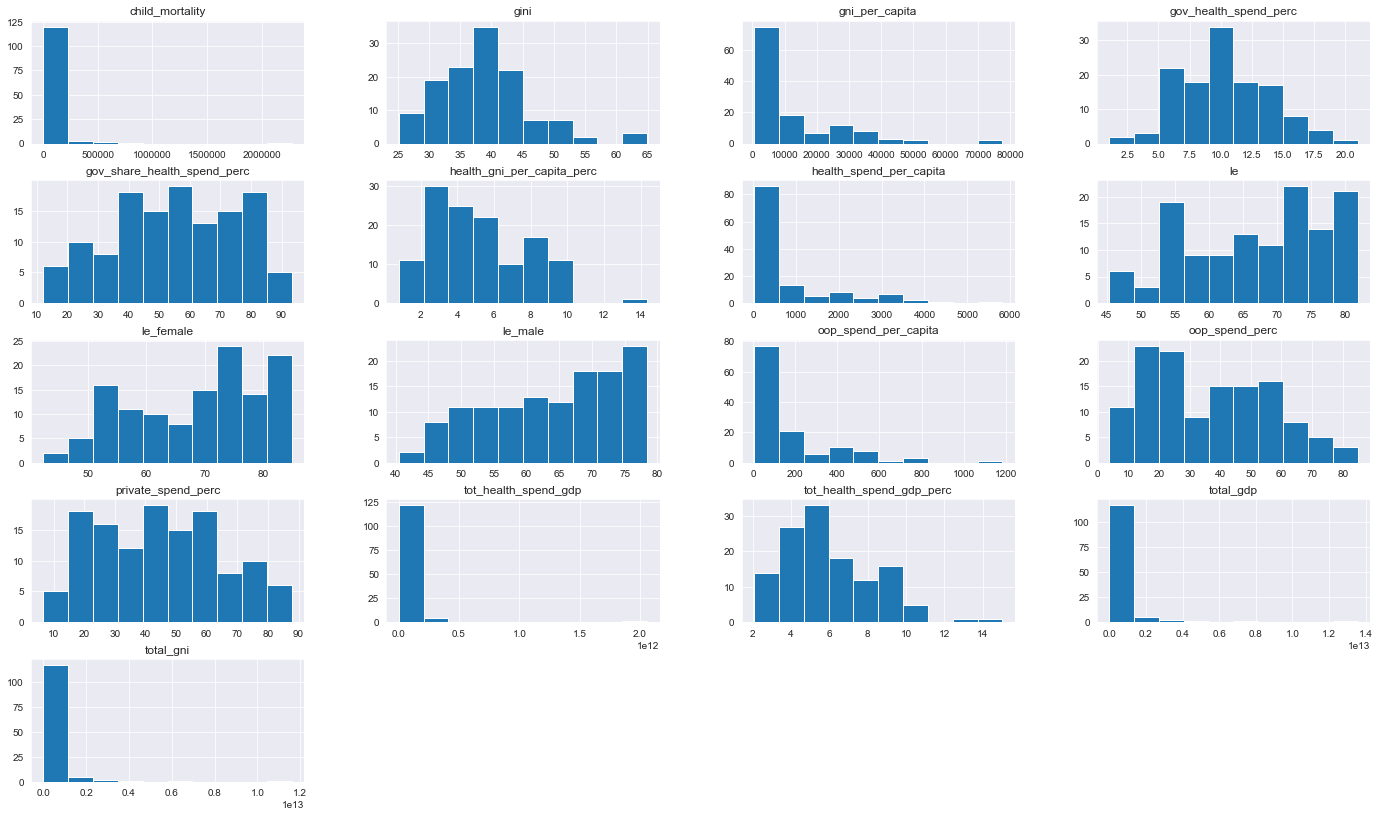

In [1014]:
df_health_econ_average.hist(figsize = (24,14));

interesting observation is that there is a very strong right skew in child mortality rate. Likewise with total wealth per capita when looking at data sets.

### Research Question 1 (Which countries have the highest life expectancy, and which have the lowest? How does it correlate with economic metrics?

In [1015]:
#Determine top and bottom quantile 10% for life expectancy
le_top = df_health_econ_average['le'].quantile(q =.9)
le_bot = df_health_econ_average['le'].quantile(q =.1)
print(f'le_top: {le_top} and le_bot: {le_bot}')

le_top: 79.0 and le_bot: 53.89874999999999


In [1016]:
#Generate subset of dataframes for more detailed analysis
df_health_econ_le_top = df_health_econ.query(f'le >= {le_top}')
df_health_econ_le_bot = df_health_econ.query(f'le <= {le_bot}')


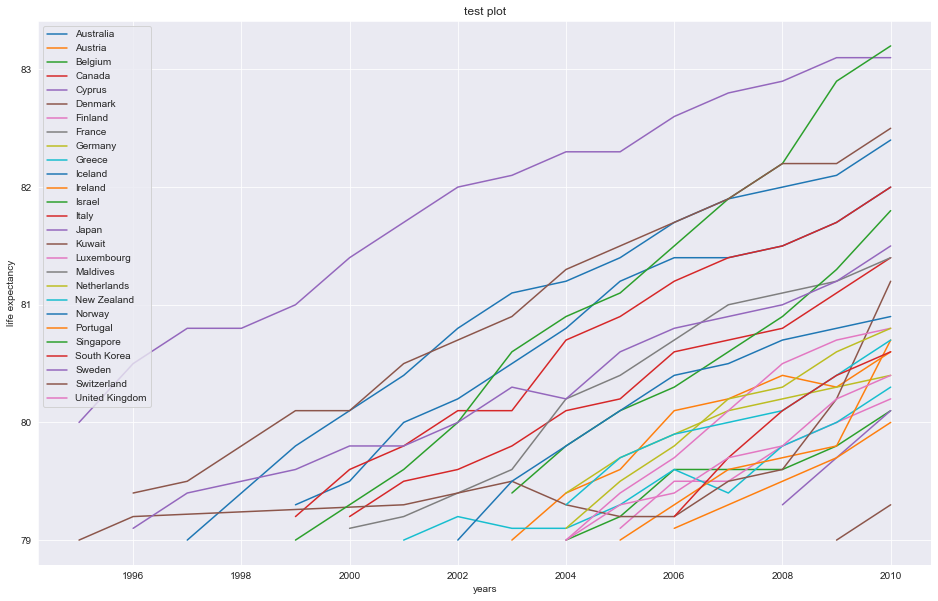

In [1017]:
#plot chart to see trend of LE improvements at highest performing countries
country_list_le_top = df_health_econ_le_top['country'].unique()
plt.figure(figsize = [16,10])
for country in country_list_le_top:
    x = df_health_econ_le_top.query(f'country == "{country}"')['year']
    y = df_health_econ_le_top.query(f'country == "{country}"')['le']
    plt.plot(x, y, label = country)
plt.title("test plot")
plt.xlabel("years")
plt.ylabel("life expectancy")
plt.legend()
plt.show()

### Highest life Expectancy
Countries with the highest life expectancy trending over time are shown in the plot above. General correlation for this data set is that life expectancy for these countries are generally increasing over time

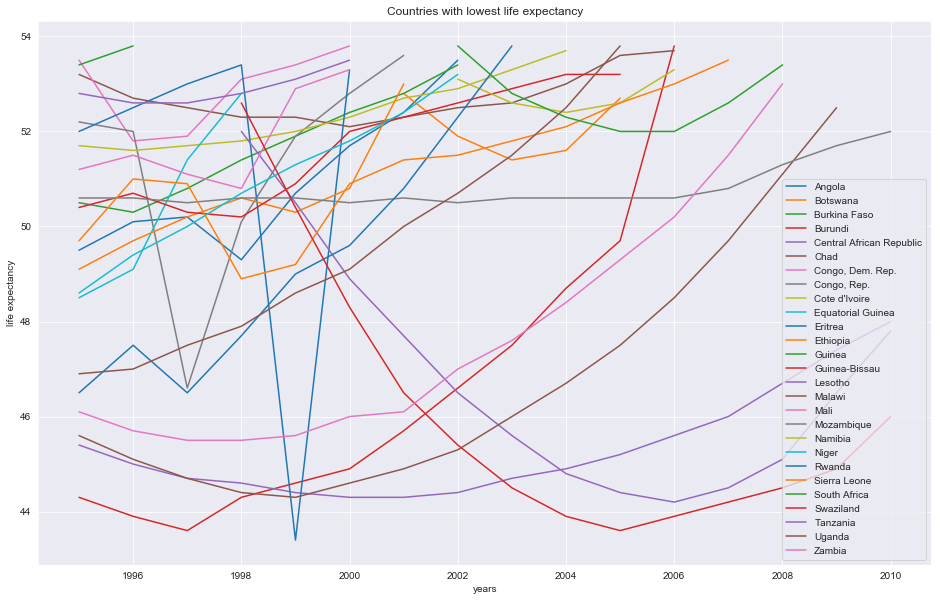

In [1018]:
#plot chart to see trend of LE improvements at lowest performing countries
country_list_le_bot = df_health_econ_le_bot['country'].unique()
plt.figure(figsize = [16,10])
for country in country_list_le_bot:
    x = df_health_econ_le_bot.query(f'country == "{country}"')['year']
    y = df_health_econ_le_bot.query(f'country == "{country}"')['le']
    plt.plot(x, y, label = country)
plt.title("Countries with lowest life expectancy")
plt.xlabel("years")
plt.ylabel("life expectancy")
plt.legend()
plt.show()

### Lowest Life Expectancy
Countries with lowest life expectancy are listed in the plot above. The correlation for improvement is not as strong among this data set.

### Health metrics compared against economic metrics

In [1019]:
#generate proper lists to allow for iteration through different economic metrics vs health metrics
health_columns = ['le_female', 'le_male', 'le', 'child_mortality']
eco_columns = list(columns)
for i in health_columns:
    eco_columns.remove(i)
print(f'eco: {eco_columns} \n \n health: {health_columns} \n\n {columns}')

eco: ['gini', 'gni_per_capita', 'gov_health_spend_perc', 'gov_share_health_spend_perc', 'oop_spend_perc', 'private_spend_perc', 'total_gdp', 'total_gni', 'health_spend_per_capita', 'tot_health_spend_gdp_perc', 'tot_health_spend_gdp', 'health_gni_per_capita_perc', 'oop_spend_per_capita'] 
 
 health: ['le_female', 'le_male', 'le', 'child_mortality'] 

 ['gini', 'gni_per_capita', 'gov_health_spend_perc', 'gov_share_health_spend_perc', 'le_female', 'le_male', 'le', 'child_mortality', 'oop_spend_perc', 'private_spend_perc', 'total_gdp', 'total_gni', 'health_spend_per_capita', 'tot_health_spend_gdp_perc', 'tot_health_spend_gdp', 'health_gni_per_capita_perc', 'oop_spend_per_capita']


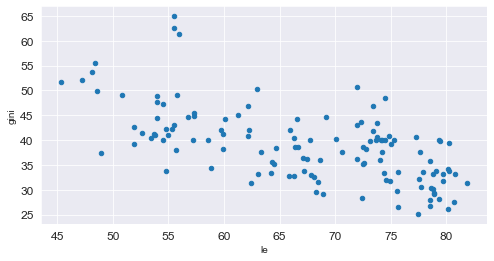

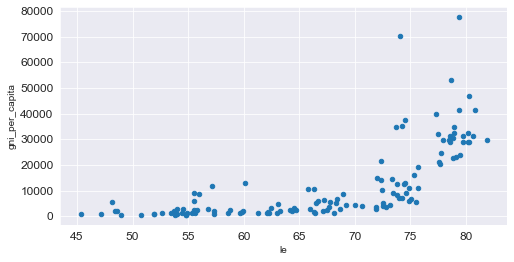

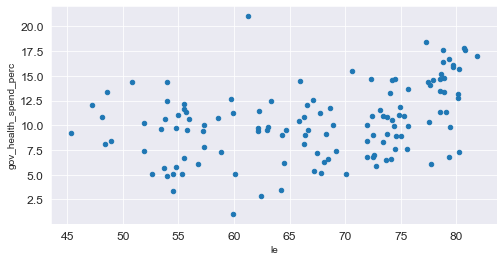

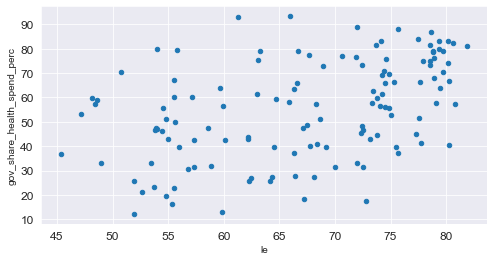

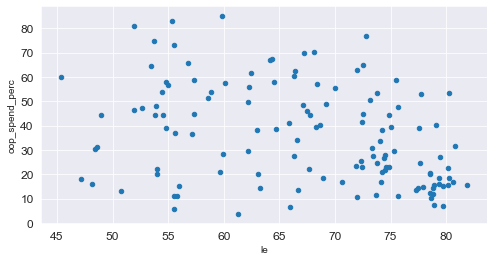

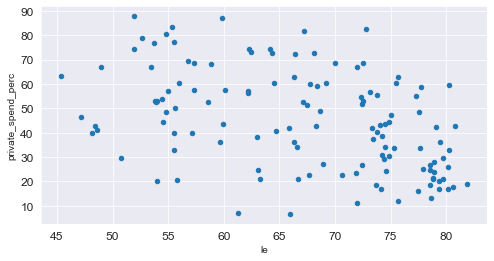

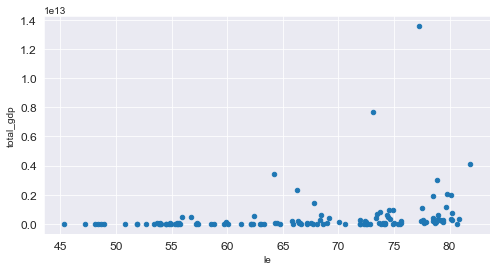

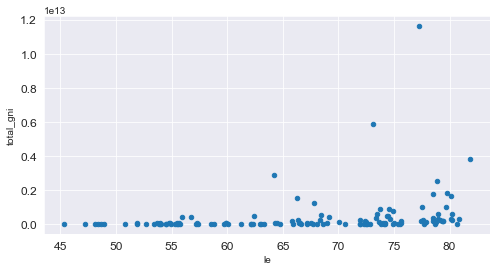

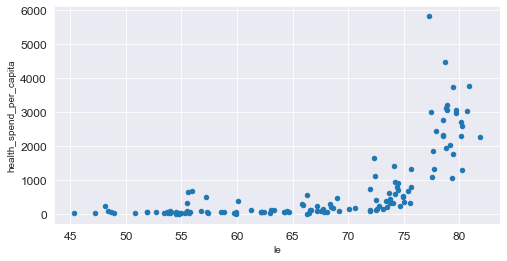

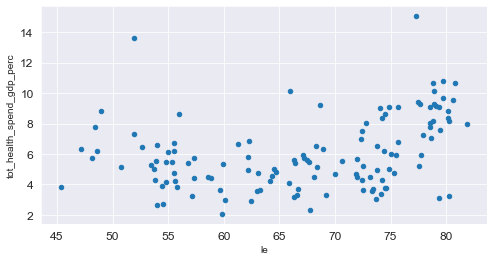

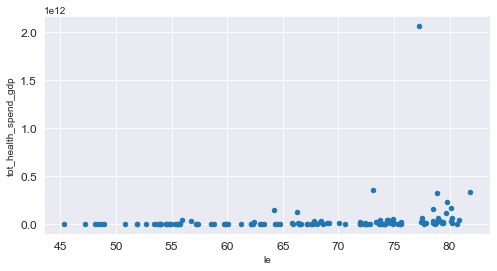

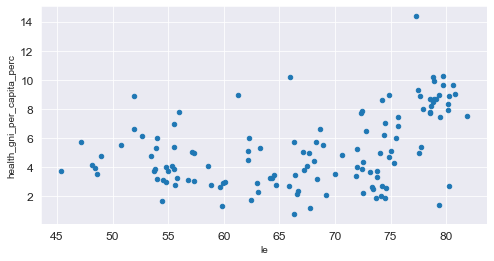

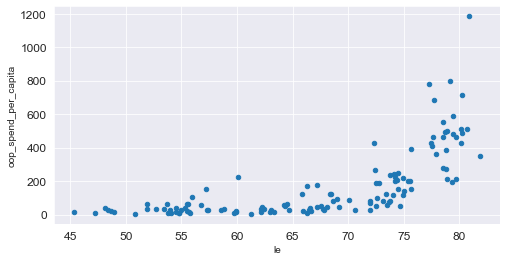

In [1020]:
#check for correlations between economic metrics and life expectancy

for count, y in enumerate(eco_columns):
    df_health_econ_average.plot(x = 'le', y = y, kind = 'scatter', figsize = (8,4), fontsize = '12')

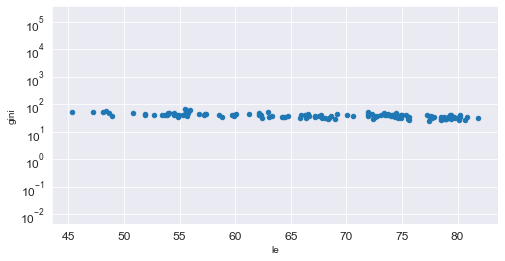

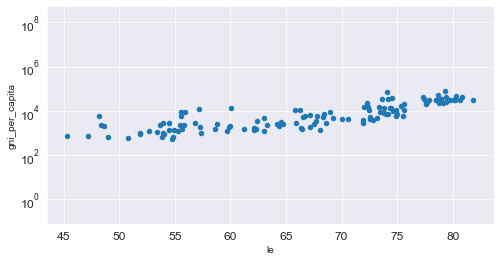

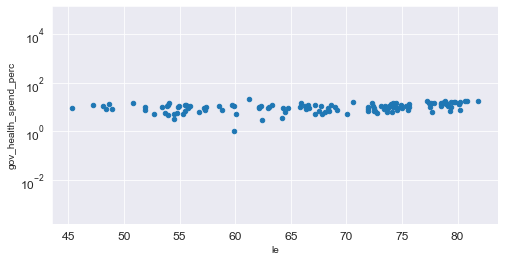

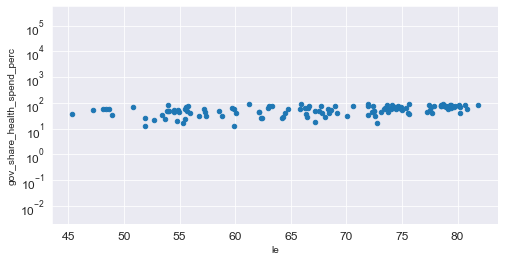

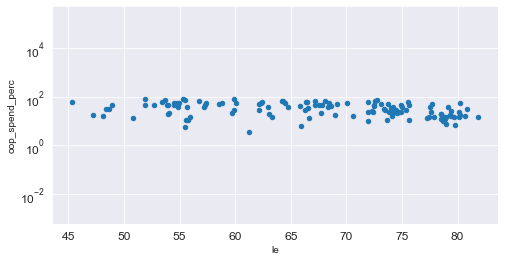

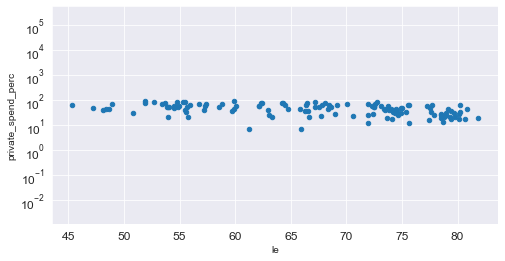

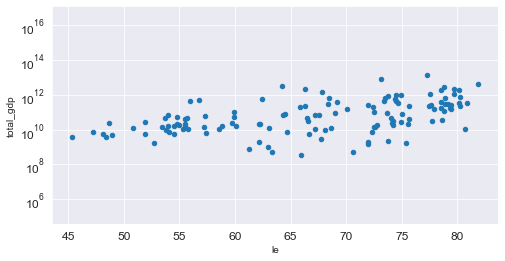

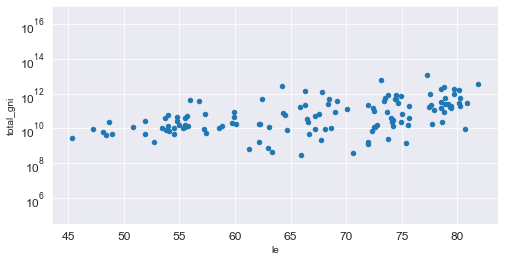

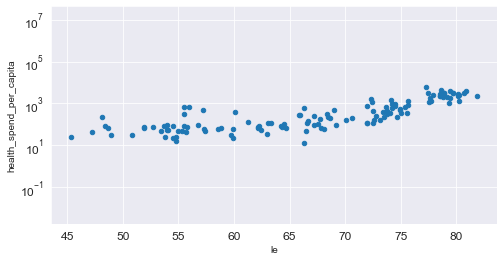

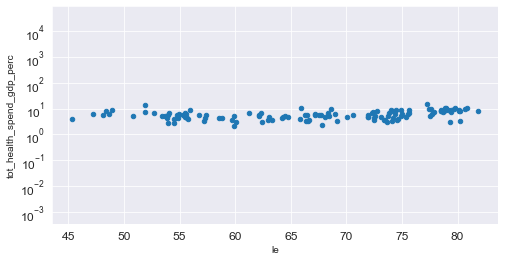

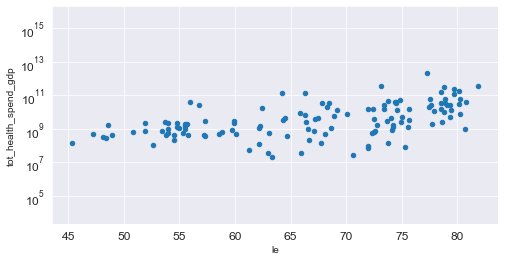

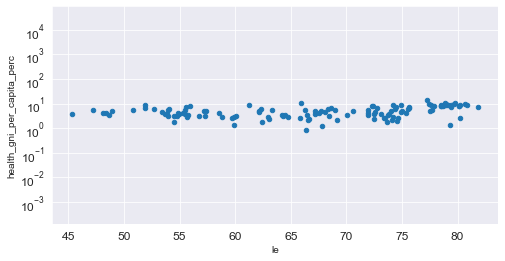

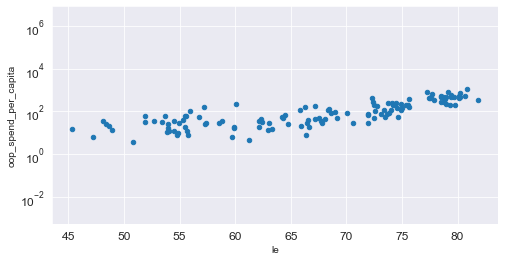

In [1021]:
#check for correlations between economic metrics and life expectancy

for count, y in enumerate(eco_columns):
    df_health_econ_average.plot(x = 'le', y = y, kind = 'scatter', logy = True, figsize = (8,4), fontsize = '12')

### Question 1 Conclusions
This data set is limited to the following years: 1995 -> 2010. Data is taken as an average per country for this time period. This data will look differently if specific years are pulled rather than averages over a set of time. This study was limited to only looking at averages over the 15 year period.

From the given data set, income inequality shows a negative correlation with life expectancy data. Interestingly, GNI per capita only seems to have a positive correlation for countries with life expectancies above 70, suggesting that other factors besides wealth are driving the differences for poorer countries. This trend is also supported by how much is spent on health care per capita. Wealthier countries tend to have higher life expectancy, though being wealthy (high GNI or GDP) is not a requirement. There MAY be a loose correlation between lower private spend on health care and higher life expectancy, but hard to tell from data set.

### Research Question 2  (What health economic factors are tied with high life expectancy, and low health expectancy?)

In [1022]:
#separate out dataframes into subsets based off top 10 and bottom 10 quartile for child mortality rate

ch_m_top = df_health_econ_average['child_mortality'].quantile(q =.9)
ch_m_bot = df_health_econ_average['child_mortality'].quantile(q =.1)
print(f'ch_m_top: {ch_m_top} and ch_m_bot: {ch_m_bot}')

ch_m_top: 113868.75000000003 and ch_m_bot: 245.75


In [1023]:
df_health_econ_ch_top = df_health_econ_average.query(f'child_mortality >= {ch_m_top}')
df_health_econ_ch_bot = df_health_econ_average.query(f'child_mortality <= {ch_m_bot}')

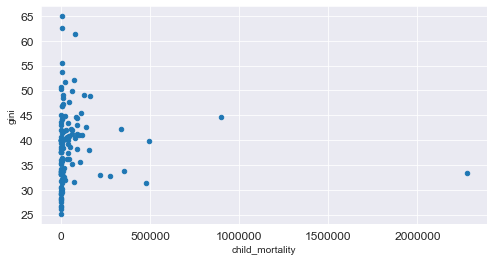

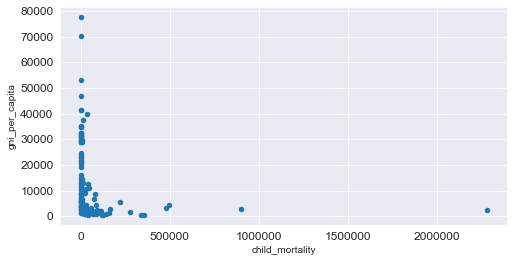

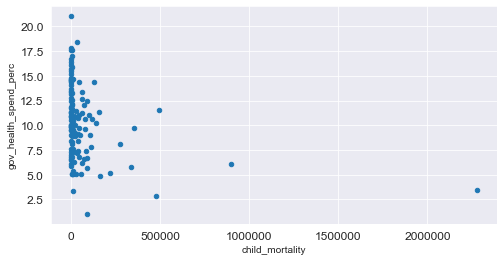

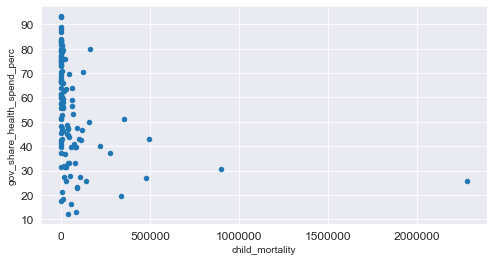

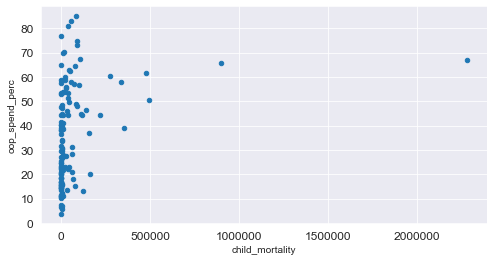

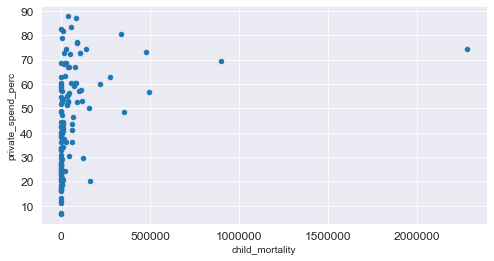

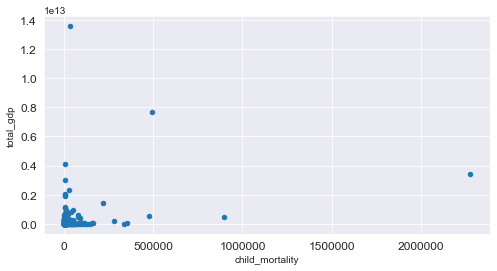

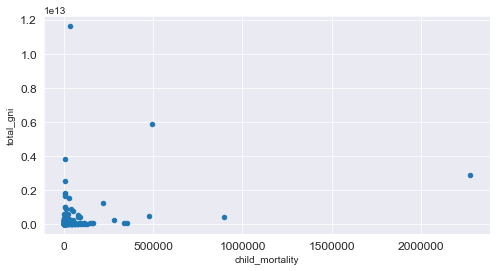

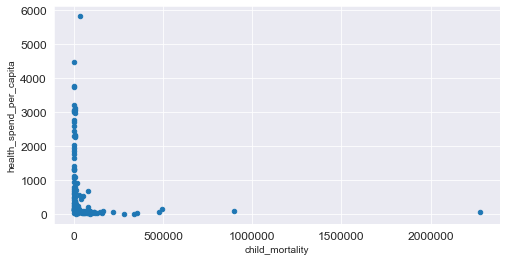

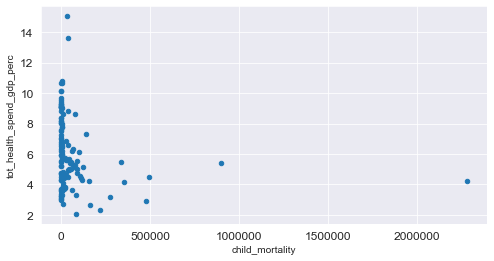

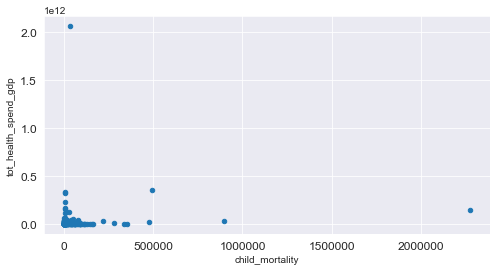

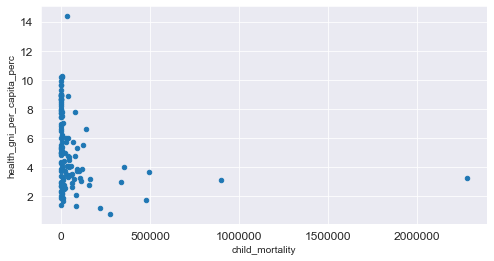

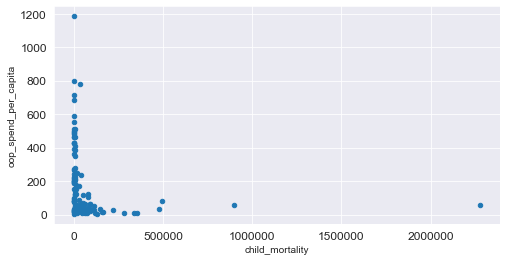

In [1024]:
#check for correlations between economic metrics and child mortality
for count, y in enumerate(eco_columns):
    df_health_econ_average.plot(x = 'child_mortality', y = y, kind = 'scatter', figsize = (8,4), fontsize = '12')
    

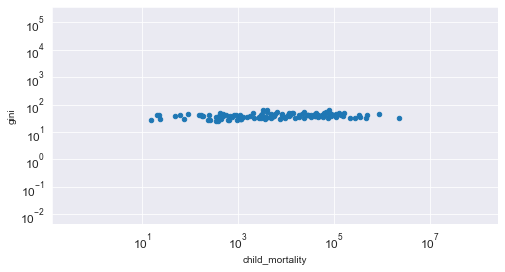

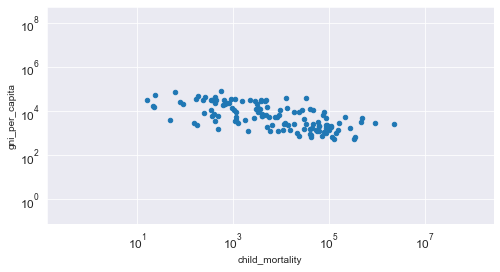

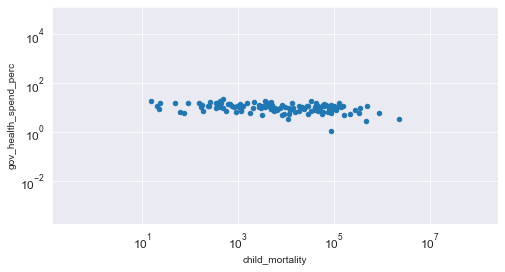

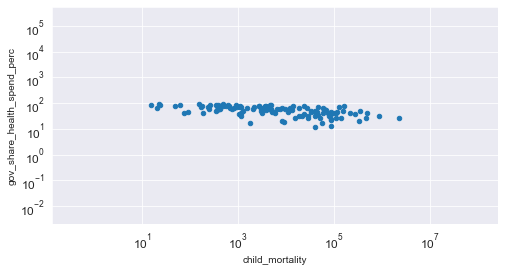

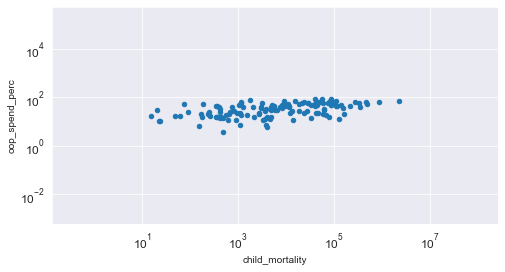

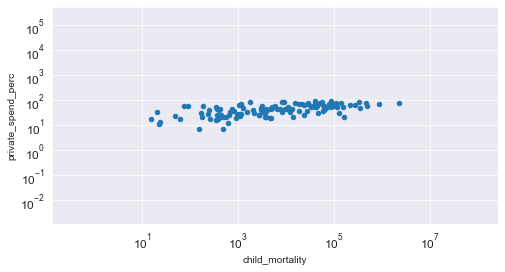

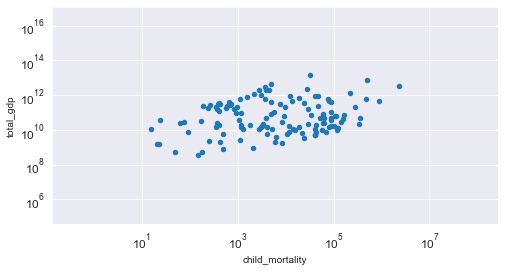

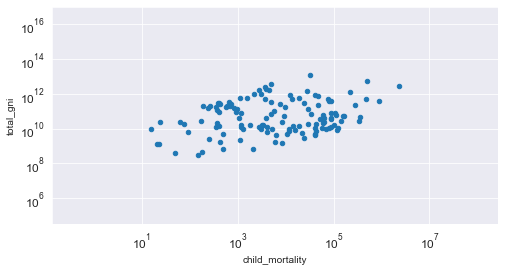

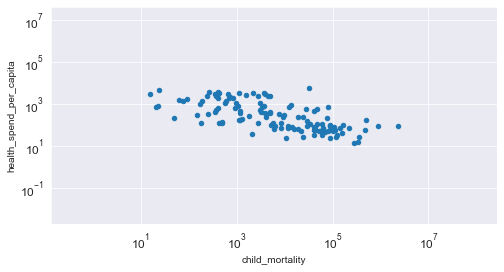

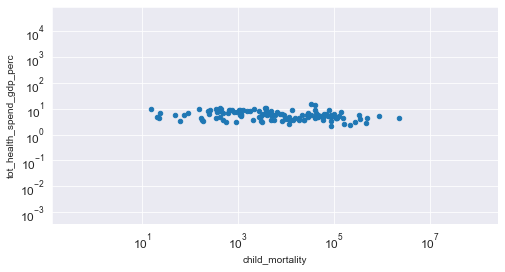

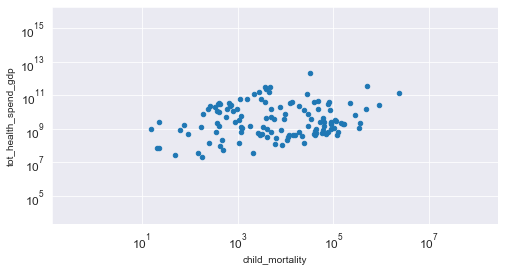

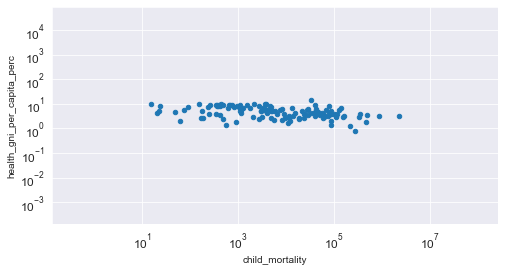

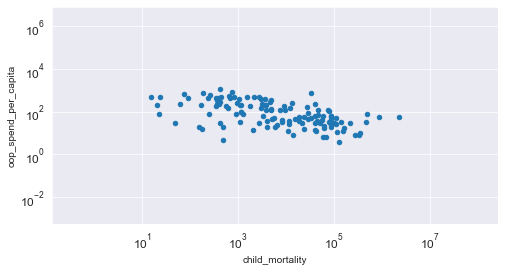

In [1025]:
for count, y in enumerate(eco_columns):
    df_health_econ_average.plot(x = 'child_mortality', y = y, logx = True, logy = True, kind = 'scatter', figsize = (8,4), fontsize = '12')
    
    

### Question 2 Conclusions
This data set is limited to the following years: 1995 -> 2010. Data is taken as an average per country for this time period. This data will look differently if specific years are pulled rather than averages over a set of time. This study was limited to only looking at averages over the 15 year period.


There are several outliers which are orders of magnitude worse in number of child mortalities vs the other countries in the data set. Therefore, the log plot gives insight on the data not seen in the regular plots.

For the outliers, the countries are generally poorer per capita, and receive less government support than the mean of the sampled countries.It is worth mentioning though that there are countries with comparable economic metrics which have substantially lower child mortality rates suggesting that this is not directly causal. 

There is a general negative correlation between increased wealth per capita and child mortality. There is a negative trend with health spend per capita and child mortality. There is a negative correlation between the % of government healthcare spend (out of total government spend) and child mortality.

There is also a positive correlation between out of pocket spend per capita (percentage) and infant mortality rate.

Unexpectedly, there is a positive correlation between a nations overall wealth and increased child mortality. This is also seen in the total amount paid by the government, which suggests other factors are at play (potentially population size, which was outside of the scope of this study).

